In [331]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Read in Data and perform SMOTE to handle class imbalance

In [332]:
df = pd.read_csv("train_df.csv", index_col=0)
X, y = pd.get_dummies(df.drop("dv.hypertension1", axis=1)), df["dv.hypertension1"]

In [333]:
X_orig, y_orig = X.copy(), y.copy()

In [334]:
X.columns

Index(['age', 'emosupport', 'financialsupport', 'prenatalsupport',
       'deliverysupport', 'psstotal', 'anxtotal', 'worryfambaby', 'exercise',
       'systolic', 'diastolic', 'worryhealthcare', 'worrysymptoms', 'ssqmean',
       'prepreglbs', 'familypreeclampsia', 'income', 'kidney1', 'lupus1',
       'collagen1', 'crohns1', 'pcos1', 'discrimination', 'bornearly',
       'race_black', 'race_hispanic', 'race_native', 'race_other',
       'race_white'],
      dtype='object')

In [335]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [336]:
X.shape

(10742, 29)

In [337]:
test_df = pd.read_csv("test_df.csv", index_col=0)
X_test, y_test = pd.get_dummies(test_df.drop("dv.hypertension1", axis=1)), test_df["dv.hypertension1"]

## Model fitting and variable selection

In [338]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

In [339]:
rf.score(X_test, y_test)

0.8336134453781513

In [340]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [341]:
f1_score(y_test, y_hat)

0.027397260273972605

In [342]:
recall_score(y_test, y_hat)

0.014084507042253521

In [343]:
precision_score(y_test, y_hat)

0.5

<AxesSubplot: >

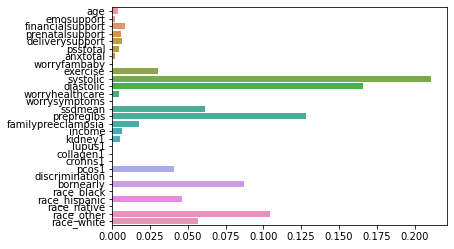

In [344]:
sns.barplot(x = rf.feature_importances_, y = rf.feature_names_in_)

In [345]:
rf.feature_importances_

array([3.86155030e-03, 1.95458504e-03, 8.59539108e-03, 5.69465183e-03,
       6.24187987e-03, 4.53219561e-03, 1.71176302e-03, 7.10330658e-04,
       3.00137305e-02, 2.10912060e-01, 1.65669615e-01, 4.26874348e-03,
       1.28535094e-04, 6.15763318e-02, 1.28450732e-01, 1.75898461e-02,
       6.34511987e-03, 5.35490712e-03, 0.00000000e+00, 1.60465339e-04,
       2.18437448e-05, 4.07629791e-02, 5.77988718e-04, 8.75051851e-02,
       0.00000000e+00, 4.61412072e-02, 0.00000000e+00, 1.04521376e-01,
       5.66969855e-02])

Use the variable importances from the full model to decide which variables to include

## Model Selection (Grid Search)

In [346]:
cols = list(map(lambda t: t[1], filter(lambda t: t[0] > 0.02, zip(rf.feature_importances_, rf.feature_names_in_))))
X_train = X[cols + ["race_black", "race_native"]]
X_train_orig = X_orig[cols + ["race_black", "race_native"]]
X_train

,exercise,systolic,diastolic,ssqmean,prepreglbs,pcos1,bornearly,race_hispanic,race_other,race_white,race_black,race_native
0,True,126,80,7.000000,145.000000,False,3,0,0,1,0,0
1,False,136,82,6.833333,220.000000,False,3,0,0,0,1,0
2,True,100,72,4.000000,98.000000,False,3,0,0,0,1,0
3,True,128,70,6.916667,335.102240,False,2,0,0,1,0,0
4,False,128,78,2.666667,262.000000,False,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10737,True,113,61,6.373740,136.732354,False,3,0,0,0,0,0
10738,True,102,65,6.308870,103.279340,False,2,0,1,0,0,0
10739,True,103,65,5.789501,184.412336,False,2,0,0,0,1,0
10740,False,118,71,6.684672,299.838241,False,3,0,0,0,1,0


In [388]:
rf = RandomForestClassifier(random_state=1234)
clf = GridSearchCV(rf, {"n_estimators": [10, 50, 100, 500], "max_depth": [1, 2, 3]})
clf.fit(X_train, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [1, 2, 3],
                         'n_estimators': [10, 50, 100, 500]})

In [389]:
X_test = X_test[cols + ["race_black", "race_native"]]

In [390]:
clf.score(X_test, y_test)

0.8067226890756303

In [391]:
best_rf = clf.best_estimator_
best_rf

RandomForestClassifier(max_depth=3, random_state=1234)

In [392]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [393]:
y_hat = clf.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_hat)}", 
      f"Precision: {precision_score(y_test, y_hat)}", 
      f"Recall: {recall_score(y_test, y_hat)}",
      f"Accuracy: {accuracy_score(y_test, y_hat)}",
      sep="\n"
     )

F1 Score: 0.15441176470588236
Precision: 0.08879492600422834
Recall: 0.5915492957746479
Accuracy: 0.8067226890756303


<AxesSubplot: >

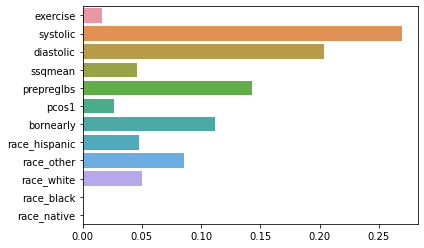

In [383]:
sns.barplot(x = best_rf.feature_importances_, y = best_rf.feature_names_in_)

In [402]:
from sklearn.tree import export_graphviz
import pydot
tree = best_rf.estimators_[0] # pick first tree in the ensemble for visualization

export_graphviz(
    tree, 
    out_file = 'tree.dot',
    feature_names = best_rf.feature_names_in_, 
    rounded = True,
    precision = 1,
    impurity=False,
    proportion=True,
    rotate=True
)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [403]:
best_rf.n_estimators

100

In [385]:
best_rf.fit(X_train_orig, y_orig)

RandomForestClassifier(max_depth=3, random_state=1234)

In [386]:
y_hat = best_rf.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_hat)}", 
      f"Precision: {precision_score(y_test, y_hat)}", 
      f"Recall: {recall_score(y_test, y_hat)}",
      f"Accuracy: {accuracy_score(y_test, y_hat)}",
      sep="\n"
     )

F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Accuracy: 0.9701680672268908


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
